# **Quantum programming II**
$\renewcommand{\bra}[1]{\langle#1|}$
$\renewcommand{\ket}[1]{|#1\rangle}$

## **Practice session 2: Two qubits**

We have seen quantum computation with a single qubit. However, to make quantum computation useful, we clearly need to be able to use more qubits. In this session we will learn to manipulation circuits involving multiple qubits.

### **Multi-qubit states**

Single qubit states were represented as linear combinations of basis qubits $\ket{0}$ and $\ket{1}$. We represent multi-qubits in a similar way, we just need to "make our basis qubits larger": each basis element will consist of more qubits. And there will be more basis elements. 

For example, a two qubit basis is $\ket{00}, \ket{01}, \ket{10}$ and $\ket{11}$. A generic qubit state is again a linear combination, but we have four terms instead of two:

$$
\ket{\psi} = \alpha_{00} \ket{00} + \alpha_{01} \ket{01} + \alpha_{10} \ket{10} + \alpha_{11} \ket{11}.
$$

The notation $\ket{00}$, and sometimes $\ket{0}\ket{0}$, are used as shorthand for the tensor product $\ket{0} \otimes \ket{0}$, a state in the space $\mathbb{C}^2 \otimes \mathbb{C}^2$. Using matrices, we can represent $\ket{\psi}$ as a column vector of coefficients

$$
\ket{\psi} = 
\begin{bmatrix}
\alpha_{00} \\ \alpha_{01} \\ \alpha_{10} \\ \alpha_{11}
\end{bmatrix}.
$$

For three qubits the basis states consist of all combinations of $0$-s and $1$-s in three slots. All in all there are eight basis states,

$$
\ket{000},\, \ket{001},\, \ket{010},\, \ket{011},\, \ket{100},\, \ket{101},\, \ket{110},\, \ket{111}.
$$

A general multi-qubit state in a three qubit state space $\mathbb{C}^2 \otimes \mathbb{C}^2 \otimes \mathbb{C}^2$ is a linear combination of basis qubits with coefficients $\alpha_i$, $i = 1, \ldots, 8.$ 

In general, for $N$ qubits the number of basis states (or the dimension of qubit state space) grows as $2^N$&mdash;this is the number of elements in the vector of coefficients $\alpha_i$.

#### **Convention**

Given qubits $\ket{q_0}, \ket{q_1}, \ldots, \ket{q_N}$ we will follow the Qiskit convention and write the least significant qubit as the rightmost one:

$$
\ket{q_N \ldots q_1 q_0}.
$$

Beware that oftentimes the opposite convention is used.

### **Multi-qubit circuit**

Creating a multi-qubit circuit follows the same pattern as in the single qubit circuit. We will use the same template except the number of qubits will be larger. In the following example we will create a three qubit circuit.

In [2]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

# create quantum circuit
qc = QuantumCircuit(3)

qc.x(0)                          # apply gate X to the first qubit
qc.x(1)                          # . . . to the 2nd qubit
qc.x(2)                          # . . . to the 3rd qubit

qc.measure_all()                 # finally measure all

# run
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print(counts)

{'111': 1024}


Let us draw the circuit.

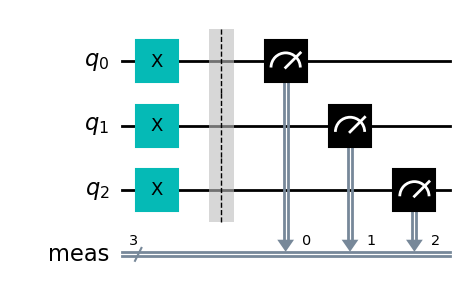

In [3]:
qc.draw("mpl")

Let us analyze the circuit. The gates $X$ were applied to each single qubit separately, without touching the neighbouring qubit. Mathematically, we can describe the action of gates as follows

$$
\left( X \otimes X \otimes X \right) \ket{000} = X\ket{0} \otimes X\ket{0} \otimes X\ket{0} = \ket{111}
$$

where for clarity we have explicitly written tensor products. The state $\ket{111}$ is exactly what we see in the `counts` output above: after running the circuit we get $111$ with probability 1. Let's plot the histogram too.

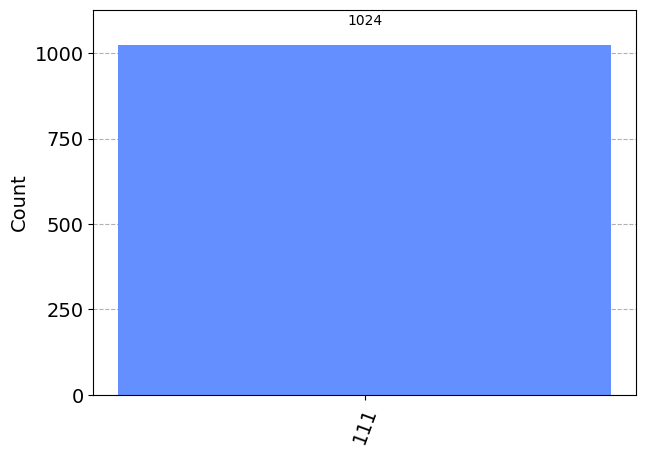

In [4]:
plot_histogram(counts)

So far it looks very similar to classical computing. 

However, let us now change the $X$ gates to Hadamard gates, and add the number of shots for clarity.

In [5]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

# create quantum circuit
qc = QuantumCircuit(3)

qc.h(0)                          # apply gate X to the first qubit
qc.h(1)                          # . . . to the 2nd qubit
qc.h(2)                          # . . . to the 3rd qubit

qc.measure_all()                 # finally measure all

# run
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=100).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print(counts)

{'100': 6, '101': 19, '111': 8, '011': 14, '001': 15, '010': 12, '000': 12, '110': 14}


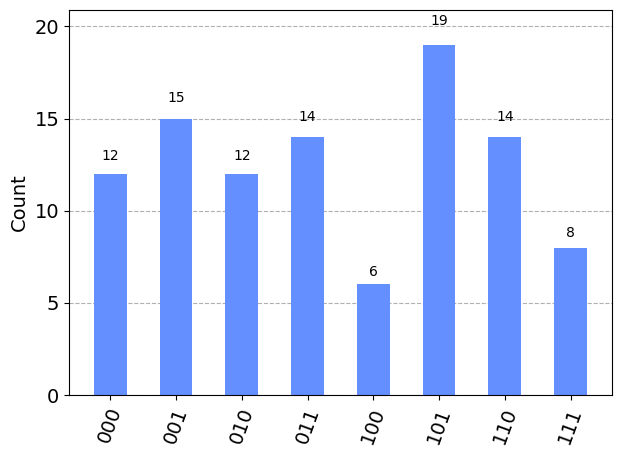

In [6]:
plot_histogram(counts)

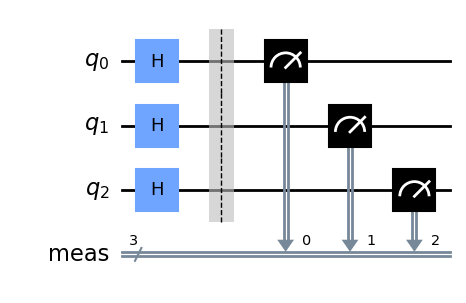

In [7]:
qc.draw("mpl")

Now we get a result which is clearly different from classical computing. In the above circuit, we ran the circuit a hundred times (`shots=100`), each time getting a different state as a result of measurement. The `counts` above shows the number of each outcome occurring. The probabilities in the histogram are again just relative occurrences of each outcome, i.e. each basis state.

Note that the structure of the circuit is similar as before: we operate on each qubit separately. This time, however, the final state *before measurement* is a linear combination of all basis states.

\begin{align}
\ket{\psi} &= \left( H \otimes H \otimes H \right) \ket{000} = H\ket{0} \otimes H\ket{0} \otimes H\ket{0}\\
&= \frac{\ket{0} + \ket{1}}{\sqrt{2}} \otimes \frac{\ket{0} + \ket{1}}{\sqrt{2}} \otimes \frac{\ket{0} + \ket{1}}{\sqrt{2}} \\
&= \frac{1}{\sqrt{8}} \left[ \left( \ket{0} + \ket{1} \right) \otimes \left( \ket{0} + \ket{1} \right) \otimes \left( \ket{0} + \ket{1} \right) \right] \\
&= \frac{1}{\sqrt{8}} \left[ \left( \ket{00} + \ket{01} + \ket{10} + \ket{11} \right) \otimes \left( \ket{0} + \ket{1} \right) \right] \\
&= \frac{1}{\sqrt{8}} \left( \ket{000} + \ket{001} + \ket{010} + \ket{011} + \ket{100} + \ket{101} + \ket{110} + \ket{111} \right).
\end{align}

We see that the amplitude for each basis state is $1 / \sqrt{8}$. In matrix notation,

$$
\ket{\psi} = 
\begin{bmatrix}
\frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}} \\ \frac{1}{\sqrt{8}}
\end{bmatrix}
$$

Let's print out the state to check this is the case. To this end, we need to remove measurement, or else the superposition state $\ket{\psi}$ will collapse into *one* of the basis states.

In [8]:
from qiskit import QuantumCircuit, Aer
import numpy as np

# create quantum circuit
qc = QuantumCircuit(3)
qc.h(0)                          # apply gate X to the first qubit
qc.h(1)                          # . . . to the 2nd qubit
qc.h(2)                          # . . . to the 3rd qubit

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector() 
result = sim.run(qc, shots=100).result()  # run circuit, get results

# get state
final_state = result.get_statevector()
print(final_state)

# check
print()
print("1 / sqrt(8) =", 1 / np.sqrt(8))

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))

1 / sqrt(8) = 0.35355339059327373


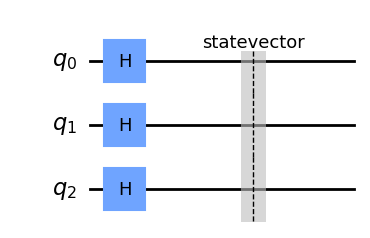

In [9]:
qc.draw("mpl")

#### **Visualization on the Bloch sphere**

Let us use `plot_bloch_multivector()` to visualize the above multi-qubit state on the Bloch sphere.

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


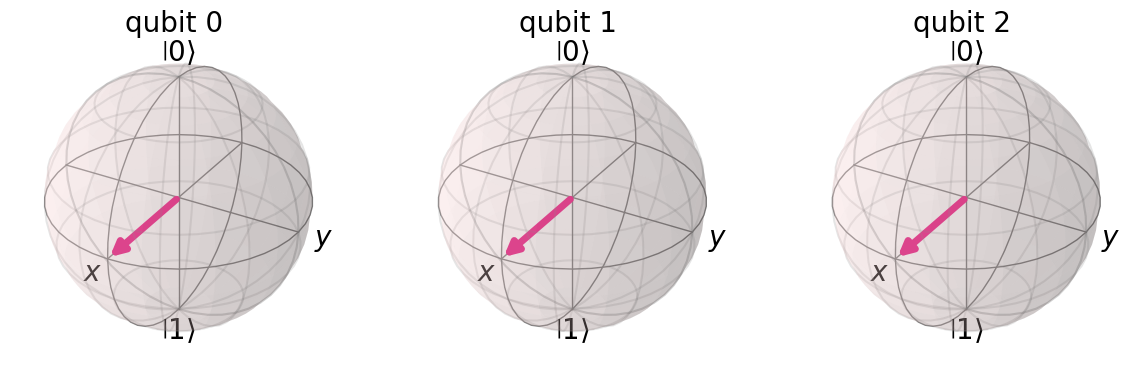

In [10]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector

# create quantum circuit
qc = QuantumCircuit(3)
qc.h(0)                          # apply gate X to the first qubit
qc.h(1)                          # . . . to the 2nd qubit
qc.h(2)                          # . . . to the 3rd qubit

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector() 
result = sim.run(qc, shots=100).result()  # run circuit, get results

# get state
final_state = result.get_statevector()
print(final_state)

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

This confirms what we know from the single state session: initially the states of all qubits are $\ket{0}$, then applying $H$ to each one brings the state to the $X$ basis state as shown on the Bloch spheres.

In general, in the multi-qubit setting, there can be any combination of single gates operating on qubits. In the following exercise you are asked to experiment with the above circuit.

> **Exercise 1**. Experiment with the above circuit, changing the number of gates that are applied to qubits. In each case, print and visualize the final state on the Bloch sphere. Also draw the respective circuit.

> 1. Apply $H$ only to the second qubit, comment out or delete the rest of the gates.

> 2. Apply $X$ to the first and $H$ to the third qubit. No gate on the second qubit.

> 3. Apply the gates $H, Z, H$ to the first qubit, and $X$ to the third qubit. No gate on the second qubit.

### **Multi-qubit gates**

So far we have been acting on each qubit separately. That is, although we act on multi-qubit states, each gate acted on a *single qubit at a time*. We now turn to a situation where a gate acts on *two qubits at the same time*. 

The most important example is the CNOT or Controlled NOT gate. It has two input qubits, the control qubit and the target qubit. If the control qubit is $\ket{0}$, the target qubit remains the same. If we set the control qubit to $\ket{1}$, then the target qubit is flipped. Assuming qubit 0 is control and qubit 1 is target, i.e. $\ket{t \, c}$, we can express this symbolically: 

$$
\ket{00} \mapsto \ket{00}, \quad
\ket{01} \mapsto \ket{11}, \quad
\ket{10} \mapsto \ket{10}, \quad
\ket{11} \mapsto \ket{01}.
$$

In other words, if the control qubit is $\ket{1}$, we apply $X$ gate to the target. 

Let's examine the following circuit for two qubits.

In [12]:
from qiskit import QuantumCircuit, Aer

# create quantum circuit
qc = QuantumCircuit(2)

qc.cx(0, 1)                      # apply CNOT, control_qubit=0, target_qubit=1
                                 # cx(control_qubit, target_qubit)
qc.measure_all()

# run
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print(counts)

{'00': 1024}


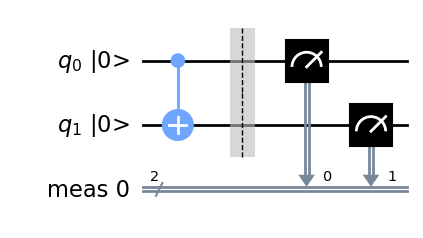

In [13]:
qc.draw("mpl", initial_state=True)

As expected, the result $00$ indicates that the final state is $\ket{00}$.

> **Exercise 2**. Change the control and target qubits, observe how the final state changes: 

> 1. Set the target qubit to $\ket{1}$ by e.g. adding the `x()` gate to qubit 1. Verify that the outcome is what you expect.

> 2. Similarly, set the control qubit to $\ket{1}$, verify that the outcome is what you expect.

So far the circuit involving CNOT has displayed the same control-target behavior as a classical circuit. In the quantum world, however, we can use superposition (or linear combination) of states. Let us put the control qubit in a superposition using the $H$ gate.

In [18]:
from qiskit import QuantumCircuit, Aer

# create quantum circuit
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)                      # apply CNOT, control=0, target=1

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc).result()  # run circuit, get results

# output statistics
final_state = result.get_statevector()     # extract statistics from results
print(final_state)

# nice latex output
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

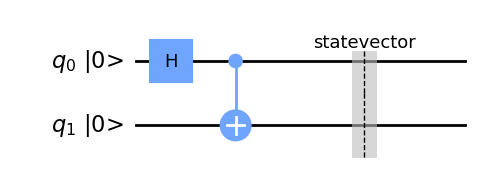

In [19]:
qc.draw("mpl", initial_state=True)

The final state vector is a sum of $\ket{00}$ and $\ket{11}$ with equal amplitudes. Check the first two equations of the session to convince yourself this is the case,

$$
\ket{\beta_{00}} = \frac{\ket{00} + \ket{11}}{\sqrt{2}}.
$$

This is an example of an **entangled** state&mdash;a state that cannot be written as a tensor product of two qubit states, $\ket{\psi_1} \otimes \ket{\psi_2}$. The particular state is called a *Bell state* or an *EPR state*. The other Bell states are

$$
\ket{\beta_{01}} = \frac{\ket{01} + \ket{10}}{\sqrt{2}}, \quad
\ket{\beta_{10}} = \frac{\ket{00} - \ket{11}}{\sqrt{2}}, \quad
\ket{\beta_{11}} = \frac{\ket{01} - \ket{10}}{\sqrt{2}}.
$$

Quantum entanglement is one of the reasons quantum computers are more powerful than classical computers at performing certain tasks. In quantum communication, entanglement is seen as resource that enables to carry out protocols that are impossible from classical point of view. In the next session we will see how entanglement allows to teleport a quantum state.

> **Exercise 3**. By applying an $X$ gate as the very first gate to qubit 0 or qubit 1, one can effectively change the input state of the circuit to $\ket{01}, \ket{10}$ or $\ket{11}$. Using the above code, investigate what are the respective final states.

Let's add measurement to the circuit.

In [20]:
from qiskit import QuantumCircuit, Aer

# create quantum circuit
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)                      # apply CNOT, control=0, target=1
qc.measure_all()

# run
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
print(counts)

{'00': 535, '11': 489}


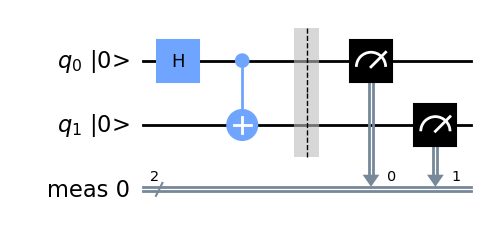

In [21]:
qc.draw("mpl", initial_state=True)

> **Exercise 4**. In the above code, change the input so the output state is $\ket{\beta_{10}}$. Does this change the measurement result?

### **Visualization of entangled states**

When we visualized states above, the output was intuitively what we would expect: the state of each qubit was shown in its "own" Bloch sphere. This feature is not generic for multi-qubit states. Such nice visualization is only possible if the state is not entangled. In this case, we can associate each system with its "own" state. 

Let us see what happens when we visualize an entangled state, a Bell state.

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


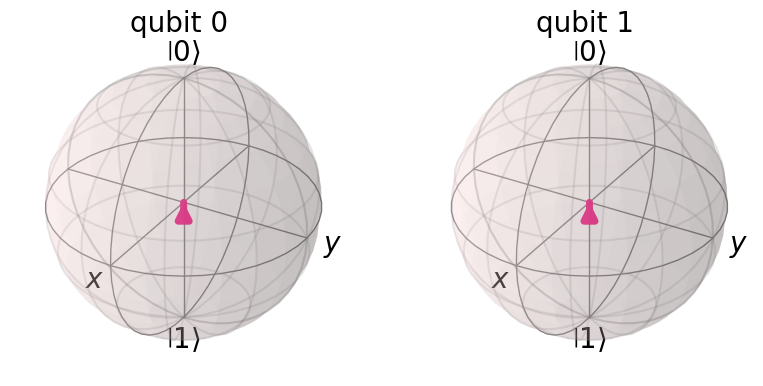

In [22]:
from qiskit import QuantumCircuit, Aer

# create quantum circuit
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)                      # apply CNOT, control=0, target=1

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc).result()  # run circuit, get results

# output statistics
final_state = result.get_statevector()     # extract statistics from results
print(final_state)

# visualize
plot_bloch_multivector(final_state)        # display final state directly on Bloch sphere

In each case, the state is shown as a dot at the center of the Bloch sphere. The reason is that if the state is entangled, we cannot assign each qubit their "own" state *in the sense of a vector*. In an entangled state, the systems are correlated in the specifically quantum manner. When we try to extract the state of a single qubit from the total state of the system, some information is lost. This is why the reduced state of a single qubit is given by a point at the center, which is mathematically a matrix of the form

$$
\begin{bmatrix}
\frac{1}{2} & 0 \\
0           & \frac{1}{2}
\end{bmatrix}.
$$

## **Summary**

In this session we learned how to manipulate multiple qubits. We saw how to apply single qubit gates to multiple qubits, as well as how to apply multi-qubit gates to qubits. The set of all single qubit gates and an entangling multi-qubit gate is enough to perform all possible operations on multi-qubit states.